In [1]:
import sys; sys.path.append('..')
from osp import *
pd.options.display.max_colwidth = 200

In [2]:
df_meta = get_corpus_metadata(min_year=1925, max_year=2025)
ids_phil = df_meta[df_meta['discipline'] == 'Philosophy'].index.tolist()
ids_lit = df_meta[df_meta['discipline'] == 'Literature'].index.tolist()

In [16]:
dfx=get_feat_counts(ids_phil)

getting feat counts: 100%|██████████| 30449/30449 [00:04<00:00, 7374.34it/s]


In [17]:
dfx.columns

Index(['sent_height', 'pos_IN', 'pos_DT', 'pos_NN', 'pos_VB', 'pos_PRP',
       'pos_MD', 'pos_TO', 'pos_VBG', 'deprel_case', 'deprel_det',
       'deprel_obl', 'deprel_nsubj', 'deprel_aux', 'deprel_root',
       'deprel_mark', 'deprel_xcomp', 'deprel_obj', 'deprel_nmod',
       'deprel_punct', 'pos_JJ', 'pos_NNS', 'pos_NNP', 'pos_VBD', 'pos_VBP',
       'pos_WDT', 'pos_CC', 'pos_RB', 'pos_WP', 'pos_VBN', 'deprel_amod',
       'deprel_cop', 'deprel_cc', 'deprel_conj', 'deprel_advmod', 'pos_VBZ',
       'pos_JJR', 'deprel_ccomp', 'pos_WRB', 'pos_SYM', 'deprel_reparandum',
       'deprel_expl', 'pos_POS', 'deprel_advcl', 'deprel_parataxis',
       'deprel_fixed', 'deprel_acl', 'deprel_compound', 'pos_PDT', 'pos_HYPH',
       'pos_EX', 'pos_JJS', 'pos_RP', 'deprel_discourse', 'pos_FW', 'pos_CD',
       'deprel_nummod', 'pos_RBS', 'deprel_appos', 'pos_UH', 'pos_NNPS',
       'deprel_dislocated', 'deprel_csubj', 'deprel_iobj', 'pos_NFP',
       'pos_RBR', 'deprel_vocative', 'deprel_dep', 'p

In [18]:
def run_comparison(comparisons, sample_size=5_000, num_runs=25, **kwargs):
    o_preds,o_feats = [],[]
    for groups in comparisons:
        comparison_str = f'{groups[0][0]} vs {groups[1][0]}'
        group_d = {
            'group1': groups[0][0],
            'group2': groups[1][0],
            'comparison': comparison_str,
        }
        print(f'Classifying {comparison_str}')
        df_preds, df_feats = classify_by_feat_counts(
            groups=groups,
            sample_size=sample_size,
            verbose=False,
            num_runs=num_runs,
            **kwargs
        )
        print('Accuracy:', df_preds.accuracy.median() * 100,'\n')
        o_preds.append(df_preds.assign(**group_d))
        o_feats.append(df_feats.assign(**group_d))
    odf_feats = pd.concat(o_feats) if o_feats else None
    odf_preds = pd.concat(o_preds) if o_preds else None
    return odf_preds, odf_feats

In [19]:
df_meta = get_corpus_metadata(min_year=1925, max_year=2025)
df_phil = df_meta[df_meta['discipline'] == 'Philosophy']
df_lit = df_meta[df_meta['discipline'] == 'Literature']

ycutoff = 1950
ycutoff2 = 2000


In [35]:
comparisons = [
    (
        ('Philosophy', df_phil.index.tolist()),
        ('Literature', df_lit.index.tolist()),
    ),
    (
        ('C20 Philosophy', df_phil.query('year>=2000').index.tolist()),
        ('C20 Literature', df_lit.query('year>=2000').index.tolist()),
    ),
    (
        ('Late Philosophy', df_phil.query(f'{ycutoff2}<=year').index.tolist()),
        ('Early Philosophy', df_phil.query(f'year<{ycutoff}').index.tolist()),
    ),
    (
        ('Late Literature', df_lit.query(f'{ycutoff2}<=year').index.tolist()),
        ('Early Literature', df_lit.query(f'year<{ycutoff}').index.tolist()),
    ),
    (
        ('Synthese', df_meta.query('journal == "Synthese" & year>=2000').index.tolist()),
        ('PMLA', df_meta.query('journal == "PMLA" & year>=2000').index.tolist()),
    ),
    (
        ('The Philosophical Review', df_meta.query('journal == "The Philosophical Review" & year>=2000').index.tolist()),
        ('The Modern Language Review', df_meta.query('journal == "The Modern Language Review" & year>=2000').index.tolist()),
    )
]

In [36]:
df_preds, df_feats = run_comparison(comparisons, sample_size=None, num_runs=1, feat_n_egs=10, feat_n=10)

Classifying Philosophy vs Literature


getting feat counts: 100%|██████████| 22885/22885 [00:02<00:00, 8053.00it/s]


Philosophy 30449 / Literature 22885


Philosophy 22885 / Literature 22885: 100%|██████████| 1/1 [00:04<00:00,  4.89s/it]


Accuracy: 70.07865414026655 

Classifying C20 Philosophy vs C20 Literature


getting feat counts: 100%|██████████| 5917/5917 [00:00<00:00, 7871.11it/s]


C20 Philosophy 11100 / C20 Literature 5917


C20 Philosophy 5917 / C20 Literature 5917: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


Accuracy: 71.56498225452087 

Classifying Late Philosophy vs Early Philosophy


getting feat counts: 100%|██████████| 4220/4220 [00:00<00:00, 7436.15it/s]


Late Philosophy 11100 / Early Philosophy 4220


Late Philosophy 4220 / Early Philosophy 4220: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


Accuracy: 68.63744075829385 

Classifying Late Literature vs Early Literature


getting feat counts: 100%|██████████| 5080/5080 [00:00<00:00, 8535.60it/s]


Late Literature 5917 / Early Literature 5080


Late Literature 5080 / Early Literature 5080: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Accuracy: 66.41732283464566 

Classifying Synthese vs PMLA


getting feat counts: 100%|██████████| 1548/1548 [00:00<00:00, 8215.86it/s]


Synthese 4936 / PMLA 1548


Synthese 1548 / PMLA 1548: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


Accuracy: 71.99612403100775 

Classifying The Philosophical Review vs The Modern Language Review


getting feat counts: 100%|██████████| 1261/1261 [00:00<00:00, 7655.69it/s]


The Philosophical Review 254 / The Modern Language Review 1261


The Philosophical Review 254 / The Modern Language Review 254: 100%|██████████| 1/1 [00:00<00:00, 16.82it/s]


Accuracy: 77.36220472440945 



In [37]:
df_preds['text_id'] = [i.split('_',1)[0] for i in df_preds.index]

preds_texts = df_preds.text_id.unique()
df_meta_preds = pd.DataFrame((get_text_metadata(id) for id in preds_texts), index=preds_texts).rename_axis('text_id')

mcols = ['discipline','century','halfcentury','period','title','author','year','decade','journal','url']
df_preds2 = df_preds.merge(df_meta_preds[mcols], on='text_id', how='left')
df_preds2.index = df_preds.index
df_preds2.iloc[0]

true_label                                            Literature
pred_label                                            Literature
test_label                               Literature / Philosophy
confidence                                              0.584666
correct                                                     True
accuracy                                                0.700787
support                                                    45770
run                                                            0
group1                                                Philosophy
group2                                                Literature
comparison                              Philosophy vs Literature
text_id                                       lit/10.1086/676417
discipline                                            Literature
century                                                      C21
halfcentury                                                 eC21
period                   

In [38]:
df_preds2['confidence1'] = [1-conf if not correct else conf for conf,correct in zip(df_preds2['confidence'],df_preds2['correct'])]
df_preds2['confidence2'] = [1-conf if correct else conf for conf,correct in zip(df_preds2['confidence'],df_preds2['correct'])]

In [39]:
df_preds2.to_excel('../data/preds_meta.xlsx')

In [33]:
df_feats.reset_index().feature.unique()

array(['pos_NN', 'pos_DT', 'pos_NNS', 'pos_NNP', 'pos_IN', 'pos_VBP',
       'pos_VB', 'deprel_punct', 'pos_JJ', 'pos_VBZ', 'pos_MD', 'pos_RB',
       'pos_CC', 'pos_UH', 'deprel_mark', 'pos_VBG', 'pos_PRP', 'pos_CD',
       'pos_FW', 'pos_NFP', 'pos_WDT', 'sent_height', 'deprel_discourse',
       'pos_SYM', 'deprel_ccomp', 'pos_WRB', 'deprel_cop', 'pos_EX',
       'deprel_compound', 'pos_GW', 'pos_WP', 'pos_VBN',
       'deprel_goeswith', 'deprel_advmod', 'pos_JJR', 'pos_JJS',
       'deprel_expl', 'deprel_vocative', 'pos_PDT', 'pos_HYPH',
       'deprel_acl', 'deprel_nummod', 'deprel_amod', 'deprel_fixed',
       'pos_RP', 'deprel_dep', 'pos_AFX', 'deprel_orphan',
       'deprel_reparandum', 'pos_RBR', 'deprel_csubj',
       'deprel_dislocated', 'pos_TO', 'deprel_case', 'deprel_xcomp',
       'deprel_appos', 'pos_NNPS', 'pos_RBS', 'deprel_advcl',
       'deprel_parataxis', 'deprel_obj', 'deprel_iobj', 'deprel_aux',
       'deprel_root', 'deprel_obl', 'pos_VBD', 'deprel_cc', 'pos_POS'

In [34]:
df_feats['feat_name'] = [x.split('_',1)[-1] for x in df_feats.feature]
df_feats.to_excel('../data/feat_weights.xlsx')

In [15]:
# # dfx=df_feats.query('comparison == "Philosophy vs Literature"')
# dfx=dfx.groupby(['feature']).mean(numeric_only=True).reset_index()
# dfx=get_df_feats_with_pos_mdw(dfx, comparisons[0], feat_n=25, feat_n_egs=5).set_index('feature')
# dfx=dfx[[c for c in dfx if not 'rank' in c]].dropna()
# dfx['feat_name'] = [x.split('_',1)[-1] for x in dfx.index]
# dfx.to_csv('../data/feat_weights.csv')
# dfx

In [ ]:
print(dfx.query('feat_desc=="?"')[['top1','top2','egs1','egs2']])

Empty DataFrame
Columns: [top1, top2, egs1, egs2]
Index: []


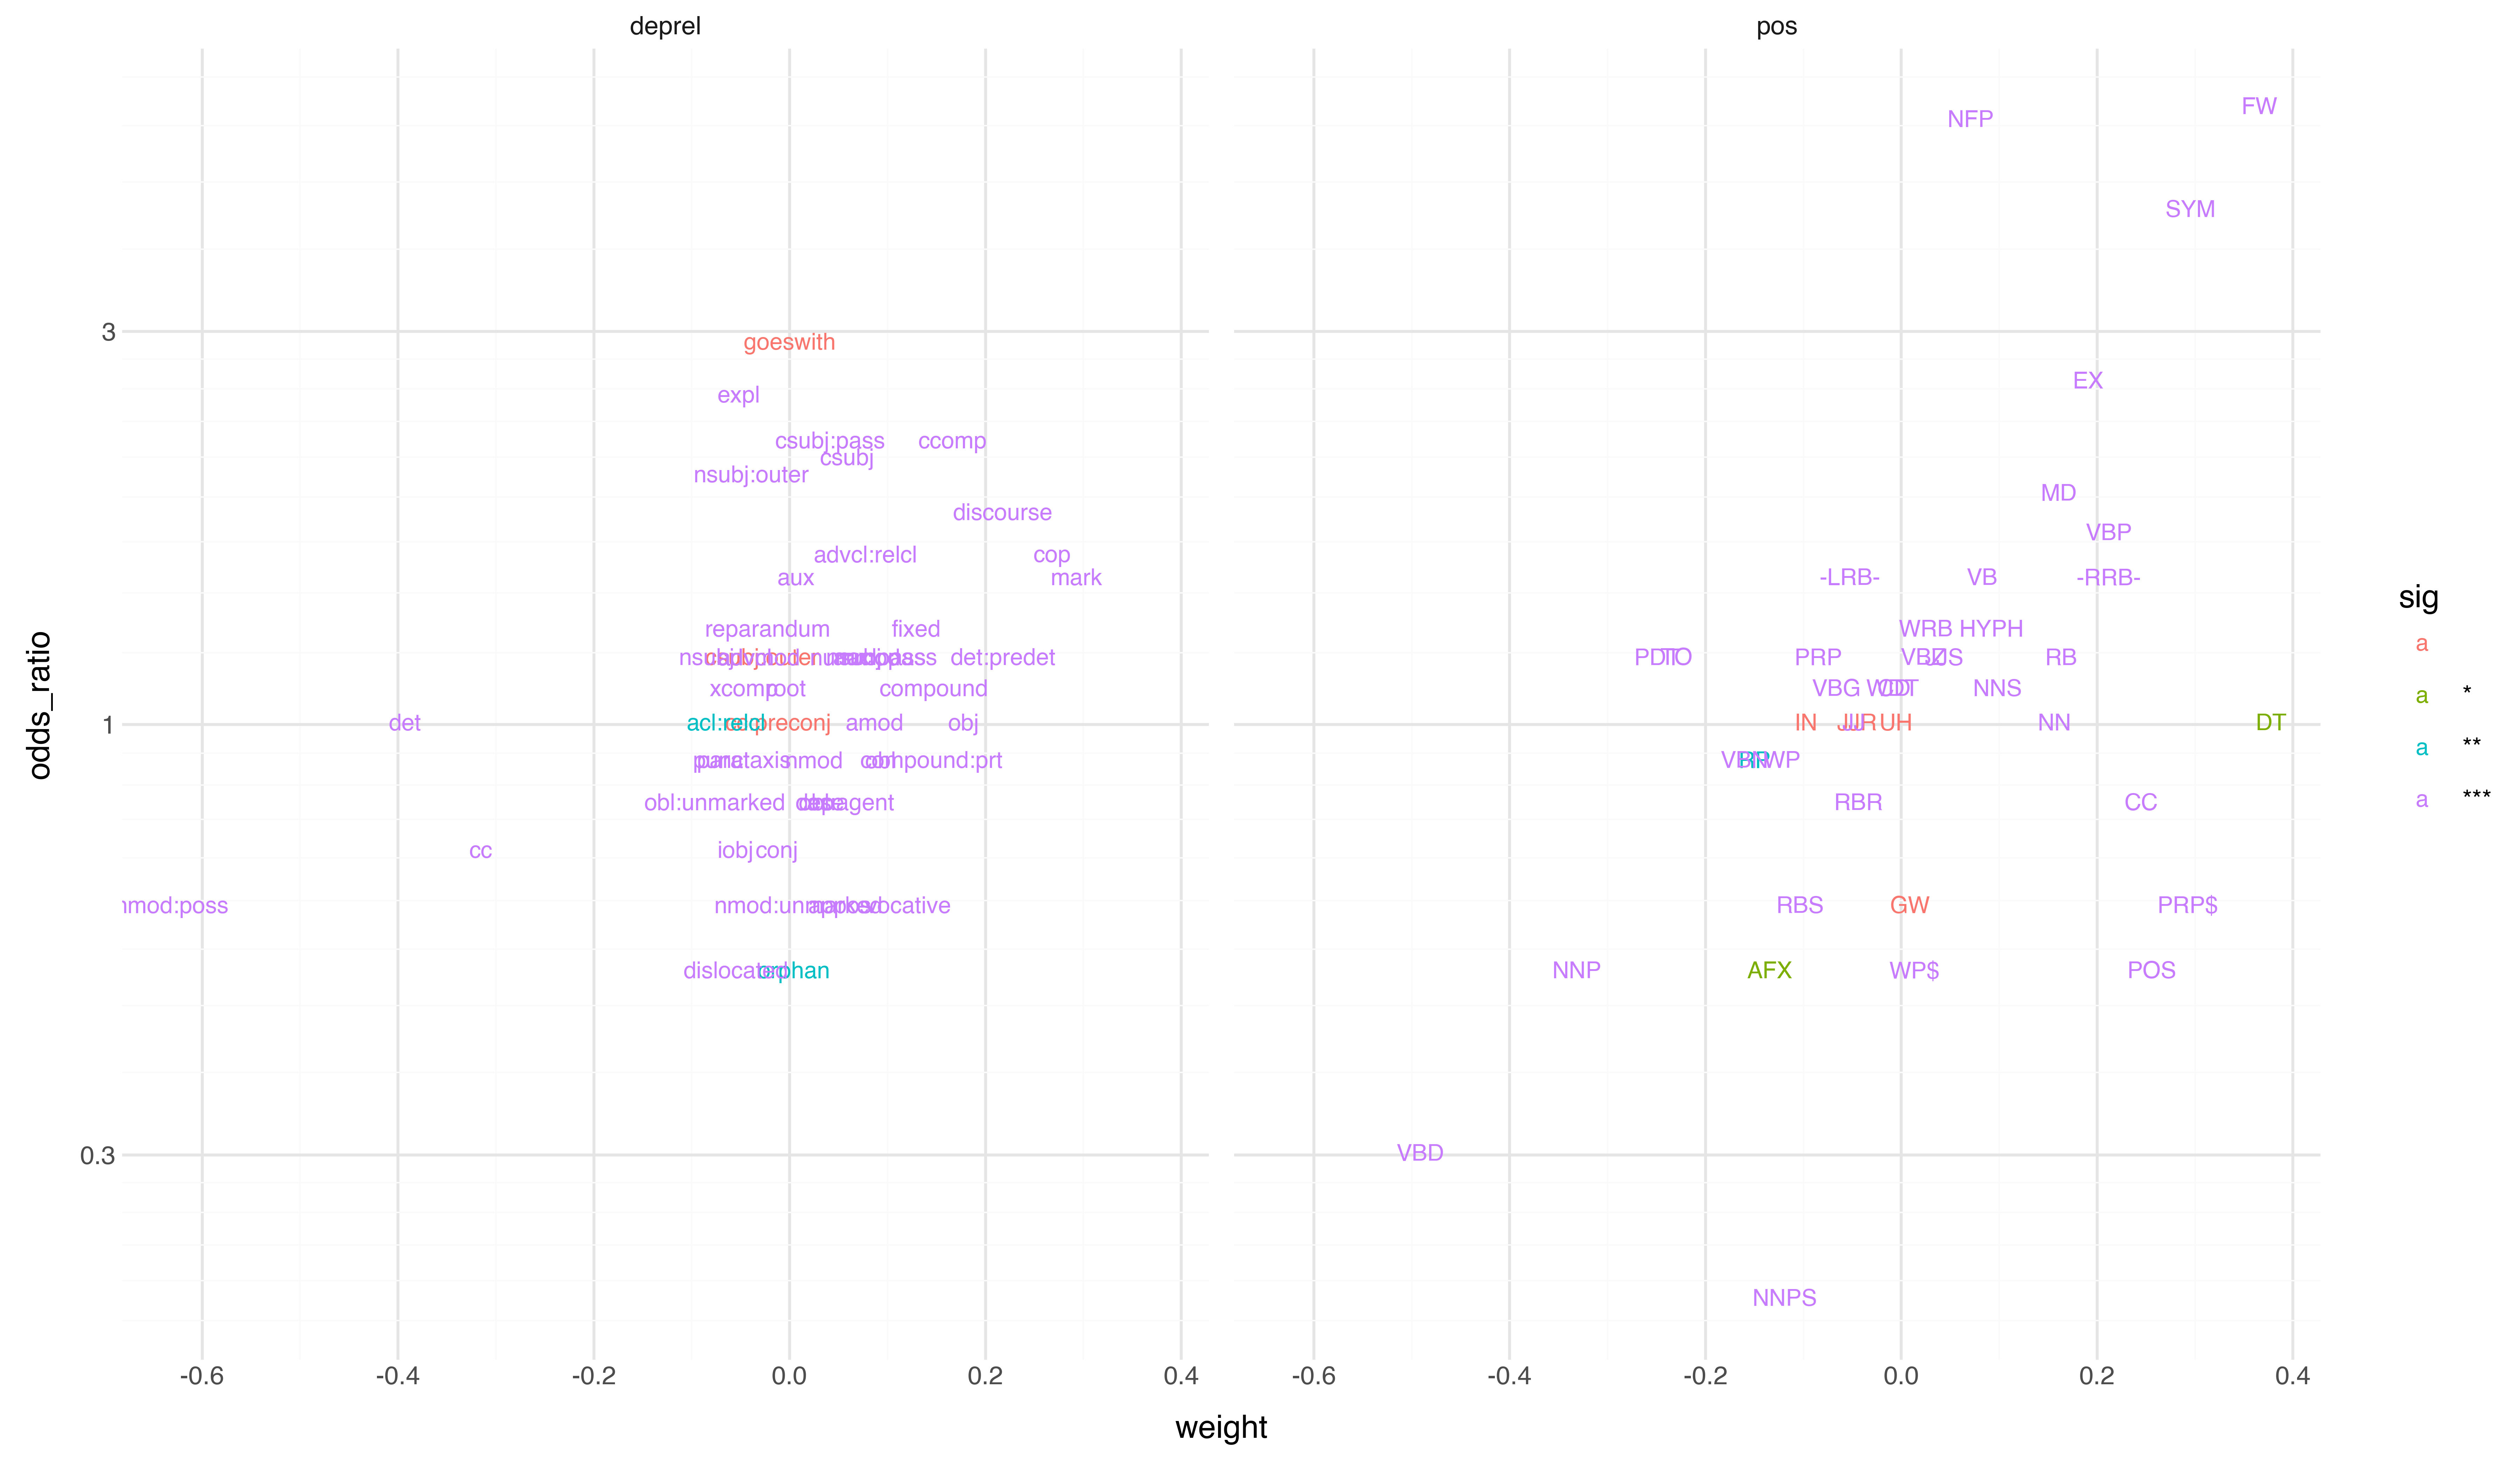

In [ ]:
fig = p9.ggplot(dfx.reset_index(), p9.aes(x='weight',y='odds_ratio',label='feat_name',color='sig'))
fig += p9.geom_text(size=8) 
fig += p9.theme_minimal()
fig += p9.scale_y_log10()
fig += p9.facet_wrap('feat_type')
fig += p9.theme(figure_size=(12, 7))
fig

In [ ]:
# dfx['odds_ratio_log_abs'] = np.abs(np.log(dfx['odds_ratio']))
# dfx.groupby('feat_type').mean(numeric_only=True).sort_values('odds_ratio_log_abs',ascending=False)

In [ ]:
printm('### Most philosophy-like')
display(dfx.sort_values('weight',ascending=False).drop(columns=['top2','egs2']).head(20).fillna(''))


### Most philosophy-like

,weight,feat_desc,result_desc,fpk1,fpk2,odds_ratio,sum1,sum2,sig,top1,egs1,feat_type,feat_name
feature,,,,,,,,,,,,,
pos_DT,0.377568,Determiner,Determiners are 1.0x more common in Literature than Philosophy.,100.1,101.0,1.0,251587.0,81282.0,*,the a this an that some these all no any those each another every both either neither anothers thats anyones ‐be aa –this th n,"""induced by T. THE triple (< / >v"" ""choosing, for A given theory T"" ""THIS procedure consists"" ""expressing T, AN observative sublanguage"" ""basic elements, THAT is, T, L and""",pos,DT
pos_FW,0.365638,Foreign word,Foreign words are 5.6x more common in Philosophy than Literature.,1.0,0.2,5.6,2610.0,149.0,***,e.g. i.e. i.e etc e.g etc. eds. cf c. pp. cf. viz. ed. esp. i.e.. i. q.v. ca. resp. cp. clearly ie then a. eg.,"""E.G. I expect that I"" ""modern physics, I.E., classical mechanics"" ""dependence — I.E"" ""of digits, ETC...), and that"" ""properties (E.G""",pos,FW
pos_SYM,0.295625,Symbol,Symbols are 4.2x more common in Philosophy than Literature.,0.6,0.1,4.2,1415.0,109.0,***,= / + { ̄ -> \ => ^ // /( /- |= ~ ^( := -+ /\ x //+( +( \( ψ+ -w >(,"""predicates, £ = { E, F,. Individual"" ""of sentences < / >v that are verifiable"" ""p (E) + p(F), lj"" ""predicates, £ = { E, F,. Individual"" ""Suppose Δ ̄ sL ψ ̄ and ψ ̄ / Δ ̄""",pos,SYM
deprel_mark,0.292990,Marker,Markers are 1.5x more common in Philosophy than Literature.,49.1,32.5,1.5,123352.0,26175.0,***,to that if as of for in by because whether since while though although than without about so from on such once before whereas with,"""that are useful TO compare the logical"" ""Thirdly, we note THAT the elementary"" ""IF this new perspective"" ""definitions in CL, AS follows"" ""defined as a class OF preparing devices""",deprel,mark
pos_PRP$,0.292299,Possessive pronoun,Possessive pronouns are 1.6x more common in Literature than Philosophy.,9.4,14.7,0.6,23614.0,11797.0,***,our their its his my her your someones there he thou ther you ist ur hy anyones thy φ o tu wis ys u qua,"""We illustrate OUR procedure in Sects"" ""she hates for THEIR anniversary"" ""changing some of ITS three basic elements"" ""year George buys HIS wife Martha the"" ""of them, but MY hunch is that when""",pos,PRP$
deprel_cop,0.267911,Copula,Copulas are 1.6x more common in Philosophy than Literature.,27.4,17.0,1.6,68856.0,13652.0,***,is are be being was were 's am been s 'm r 're m isnt re thats can does \ arent im = will hes,"""following statement IS then straightforward"" ""statements that ARE useful to compare"" ""To BE precise, we intend"" ""responsible, but BEING responsible also"" ""evolutionary selection WAS at best random""",deprel,cop
pos_POS,0.255558,Possessive ending,Possessive endings are 2.1x more common in Literature than Philosophy.,3.5,7.5,0.5,8873.0,6013.0,***,'s ' s ťs ́s αs *s ws ys ble,"""instance, Paul S belief that he"" ""Although Quine s talk of ontology"" ""information about th S face to an inferential"" ""captured by Wimsat ŤS notion of successional"" ""of the Humean ́S fundamenta...",pos,POS
pos_CC,0.244656,Coordinating conjunction,Coordinating conjunctions are 1.3x more common in Literature than Philosophy.,26.5,35.1,0.8,66659.0,28266.0,***,and or but both either nor yet neither & plus n minus t/ ór ˗˗like }. a i( φ( ± xn <» and' c( cts.,"""given theory T AND classical language"" ""verifiable (OR testable) according"" ""formal way, BUT it can be provided"" ""sentence has BOTH a truth value and"" ""evolutionary forces have EITHER pushed our ...",pos,CC
deprel_det:predet,0.217727,?,?s are 1.2x more common in Philosophy than Literature.,1.2,1.0,1.2,3067.0,811.0,***,such all both quite either half whatever neither what each next regards nary,"""property, while SUCH a set can not be"" ""responsible for ALL the data that instantiate"" ""that encompasses BOTH practical and theoretical"" ""interesting facts QUITE another, and the"" ""EITHER positio...",deprel,det:predet


In [ ]:
printm('----\n### Most literature-like')
display(dfx.sort_values('weight',ascending=True).drop(columns=['top1','egs1']).head(20).fillna(''))

----
### Most literature-like

,weight,feat_desc,result_desc,fpk1,fpk2,odds_ratio,sum1,sum2,sig,top2,egs2,feat_type,feat_name
feature,,,,,,,,,,,,,
deprel_nmod:poss,-0.631160,Possessive nominal modifier,Possessive nominal modifiers are 1.7x more common in Literature than Philosophy.,12.8,22.3,0.6,32193.0,17947.0,***,his its their her our my whose your one novel milton poet thy women man play shakespeare god narrator poem author king james eliot reader,"""villagers for HIS eccentricities"" ""Literature offered ITS first specialized"" ""universities with THEIR secular research"" ""nineties, and like HER peers at Mount"" ""be based on OUR physical interaction""",deprel,nmod:poss
pos_VBD,-0.491214,"Verb, past tense","Verb, past tenses are 3.2x more common in Literature than Philosophy.",4.6,14.8,0.3,11664.0,11895.0,***,was were had did made became wrote came took said saw began thought went felt found knew seemed called used wanted read sought gave appeared,"""nineteenth century WAS a society engaged"" ""These gains WERE crucial in part"" ""These women then HAD to redefine themselves"" ""curricular debut but DID not survive"" ""American literature MADE a curri...",pos,VBD
deprel_det,-0.393096,Determiner,Determiners are 1.0x more common in Literature than Philosophy.,93.8,97.0,1.0,235682.0,78072.0,***,the a this an these no that all any some those another every what each both which whatever neither either thee whichever it e th,"""education in THE nineties, and"" ""the subject had A reputation as elementary"" ""once again - THIS time definitively"" ""Chamberlin received AN M.A"" ""THESE women then had""",deprel,det
pos_NNP,-0.331316,"Proper noun, singular","Proper noun, singulars are 2.1x more common in Literature than Philosophy.",20.3,43.0,0.5,50987.0,34612.0,***,god english new john england la derrida united milton shakespeare james europe london university king world henry e christ war de william america ed. eliot,"""their duty to GOD, to their mother"" ""called Spoken ENGLISH ), Drama, and"" ""Fiction and Film (NEW York and Oxford"" ""the example of JOHN Bunyan, author"" ""most others in ENGLAND during this period""",pos,NNP
deprel_cc,-0.315389,Coordinating conjunction,Coordinating conjunctions are 1.3x more common in Literature than Philosophy.,26.3,35.1,0.7,65978.0,28229.0,***,and or but yet rather as / nor & + plus n let minus for not neither ed. pp. dis re either vol. add. .eir,"""the nineties, AND like her peers"" ""redefine themselves OR be eliminated"" ""by men, some BUT not all of whom"" ""YET the comparative"" ""the aggregate RATHER than as distinct""",deprel,cc
pos_PDT,-0.249297,Predeterminer,Predeterminers are 1.2x more common in Philosophy than Literature.,1.2,1.0,1.2,2925.0,797.0,***,all such quite half each many both nary,"""soft landing ALL the same, as the"" ""perfectly clear what SUCH an interconnection"" ""fact, he makes QUITE the opposite claim"" ""And perhaps HALF a dozen years before"" ""mountains are EACH a recogniza...",pos,PDT
pos_TO,-0.229666,to,tos are 1.2x more common in Philosophy than Literature.,15.6,12.7,1.2,39215.0,10241.0,***,to na re by shd y for es aban mo,"""women then had TO redefine themselves"" ""literary are NA be come evident"" ""an effort to RE shape the religion"" ""on) should BY now be self‐evident"" ""least ye hand SHD betray it""",pos,TO
pos_VBN,-0.160315,"Verb, past participle","Verb, past participles are 1.1x more common in Literature than Philosophy.",21.2,23.2,0.9,53338.0,18675.0,***,been given made seen written taken known called used found based said defined understood associated lost done read described become published produced considered established represented,"""It had long BEEN the Seminary s"" ""if they were GIVEN, not pro jected"" ""station she is MADE to think of the"" ""however, it was SEEN that this strategic"" ""last words, WRITTEN years before his""",pos,VBN
pos_RP,-0.150231,Particle,Particles are 1.1x more common in Literature than Philosophy.,1.9,2.1,0.9,4816.0,1690.0,**,out up on down off in

In [ ]:
printm('### Not significant')
display(dfx[dfx.sig!='***'])

### Not significant

,weight,feat_desc,result_desc,fpk1,fpk2,odds_ratio,sum1,sum2,sig,top1,top2,egs1,egs2,feat_type,feat_name
feature,,,,,,,,,,,,,,,
pos_DT,0.377568,Determiner,Determiners are 1.0x more common in Literature than Philosophy.,100.1,101.0,1.0,251587.0,81282.0,*,the a this an that some these all no any those each another every both either neither anothers thats anyones ‐be aa –this th n,the a this an that these all no some those any another each both every neither either thee whatsoever thy anothers whiche yonder th tothe,"""induced by T. THE triple (< / >v"" ""choosing, for A given theory T"" ""THIS procedure consists"" ""expressing T, AN observative sublanguage"" ""basic elements, THAT is, T, L and""","""mean that after THE twenties American"" ""especially as A result of the second"" ""In THIS era of flux, American"" ""Sweet took AN A.B"" ""as part of THAT push, the college""",pos,DT
pos_GW,0.008825,'Goes With' or error marker,'Goes With' or error markers are 1.6x more common in Literature than Philosophy.,0.0,0.0,0.6,2.0,1.0,,max isaac,futuri,"""DISAGREEMENT by MAX Kolbel ABSTRACT"" ""ISAAC LEVI GAIFMAN""","""FUTURI SPES VIRTUTEM ALIT""",pos,GW
deprel_orphan,0.004129,Orphan,Orphans are 2.0x more common in Literature than Philosophy.,0.0,0.0,0.5,62.0,39.0,**,comments particular way not contexts time itself p minute proofs century case book encyclopaedia now agent level second times others part especially group might help,all particular england generations siren institution universal modernist feedback fiat doing other objects times itself ad comments engagements oxford capital accurately abstract hand opportunity ...,"""Steve Yablo for COMMENTS on earlier drafts"" ""rather than DS in PARTICULAR"" ""present in such a WAY that he can do"" ""properties, others NOT"" ""in different CONTEXTS""","""and above ALL out of reach of"" ""things, and in PARTICULAR to the way in which"" ""ed. Unlike ENGLAND at this period"" ""time and over GENERATIONS the process that"" ""quill pen to SIREN""",deprel,orphan
deprel_goeswith,0.000000,Goes with,Goes withs are 2.9x more common in Philosophy than Literature.,0.0,0.0,2.9,9.0,1.0,,_,_,"""inconsistent subset of _ the proposition""",""": ::: : _ :: E g :""",deprel,goeswith
pos_UH,-0.005759,Interjection,Interjections are 1.0x more common in Literature than Philosophy.,0.7,0.7,1.0,1681.0,547.0,,say no like yes well viz h o w iii hi w- b- iv b m ing p- oh n- f- ß y m- alas,no well like yes oh o say please vol alas yeah ah ing aer iv nay ich ix welcome um ll yea hi dis je,"""rather than, SAY of a depth - of"" ""NO - one involved"" ""assumption that — LIKE sets — pluralities"" ""YES, credit - seeking"" ""Georges means - WELL gift giving would""","""Huck says, NO m"" ""Shes WELL; she thanks My"" ""like x (and LIKE x, as we can"" ""YES, un homme de"" ""the scene : OH, my Margaret —""",pos,UH
deprel_cc:preconj,-0.011720,Preconjunct,Preconjuncts are 1.0x more common in Philosophy than Literature.,1.1,1.1,1.0,2764.0,877.0,,both either neither what,both either neither that each,"""sentence has BOTH a truth value and"" ""evolutionary forces have EITHER pushed our angry"" ""other item, NEITHER to our past experiences"" ""flourishing no matter WHAT her particular""","""suggested by BOTH poem and novel"" ""without negating EITHER their historicity"" ""NEITHER happens, a nonevent"" ""display, not THAT of grantsmanship"" ""of groupings, EACH with its institutional""",deprel,cc:preconj
deprel_csubj:outer,-0.028333,Outer clause clausal subject,Outer clause clausal subjects are 1.2x more common in Philosophy than Literature.,0.0,0.0,1.2,107.0,29.0,,matters do take describe seems have seeing happens fail act require enjoy desire value thinking argue love instantiate know manifest speak goes care hold choose,make take speak seek troubles modernize conquer matters inhabit making mediator talk return interests globalize write treat embracing see reading confront avenge fail doing set,"""What MATTERS is whether the"" ""What stereo

In [ ]:
# dfx.loc[[i for i in dfx.index if 'sent_' in i]].sort_values('weight',ascending=False)